In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset then normalize the pixel value between 0 and 1
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Flatten the images to a 1D array
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
# Define the autoencoder architecture
input_size = 784  # 28x28 pixels flattened
encoding_dim = 32  # Size of the encoded representation (you can adjust this)

In [ ]:
input_img = tf.keras.Input(shape=(input_size,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(input_size, activation='sigmoid')(encoded)

In [ ]:

autoencoder = models.Model(input_img, decoded)

In [ ]:

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 5s 15ms/step - loss: 0.2751 - val_loss: 0.1848
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1679 - val_loss: 0.1522
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1436 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1285 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1180 - val_loss: 0.1125
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1106 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1055 - val_loss: 0.1020
Epoch 8/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1017 - val_loss: 0.0988
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0991 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0973 - val_los

In [ ]:
# Create an encoder model to extract features from the latent space
encoder = models.Model(input_img, encoded)

In [ ]:
# Encode the images to get the reduced features
encoded_imgs_train = encoder.predict(x_train)
encoded_imgs_test = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Visualize original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

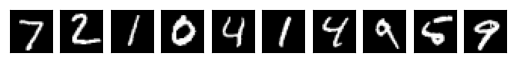

In [ ]:
for i in range(n):
   # Original images
   ax = plt.subplot(2, n, i + 1)
   plt.imshow(x_test[i].reshape(28, 28))
   plt.gray()
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)
plt.show()

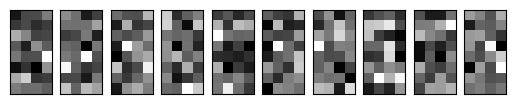

In [ ]:
 # Encoded images
for i in range(n):
   ax = plt.subplot(2, n, i + 1 + n)
   plt.imshow(encoded_imgs_test[i].reshape(8, 4))  # Adjust the shape based on encoding_dim
   plt.gray()
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)
plt.show()